THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## First Exploration

In [1]:

import numpy as np 
import pandas as pd 

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

aisles.csv
aisles.csv.zip
departments.csv
departments.csv.zip
order_products__prior.csv
order_products__prior.csv.zip
order_products__train 2.csv
order_products__train.csv
order_products__train.csv.zip
orders.csv
orders.csv.zip
products.csv
products.csv.zip



In [2]:
orders = pd.read_csv('./input/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
prior = pd.read_csv('./input/order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
train = pd.read_csv('./input/order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


users, identified by user_id in the orders csv, make orders which are identified by order_id;

each order of a user is characterized by an order_number which specifies when it has been made with respect to the others of the same user;

each order consists of a set of product each characterized by an add_to_cart_order feature representing the sequence in which they have been added to the cart in that order

for each user we may have n-1 prior orders and 1 train order OR n-1 prior orders and 1 test order in which we have to state what products have been reordered

In [5]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0


In [6]:
products = pd.read_csv('./input/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
aisles = pd.read_csv('./input/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [142]:
print(aisles.shape)

(134, 2)


In [9]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [10]:
mt['product_name'].value_counts()[0:10]

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

In [85]:
len(mt['product_name'].unique())

49677

In [87]:
prior.shape

(32434489, 4)

### Clustering Customers

There are 143 types of product (aisle).

In [88]:
len(mt['aisle'].unique())

134

Fresh fruits and fresh vegetables are the best selling goods.

In [89]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

I want to find a possible clusters among the different customers and substitute single user_id with the cluster to which they are assumed to belong. Hope this would eventually increase the model performance.

Ths first thing to do is creating a dataframe with all the purchases made by each user

In [11]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)


In [15]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466371,-0.145735,0.269549,-1.434165
1,6.463208,36.751116,8.382554,15.097559,-6.921268,-0.977487
2,-7.990302,2.404383,-11.030065,0.672228,-0.442262,-2.823882
3,-27.991129,-0.755823,-1.921732,2.091899,-0.288361,0.926568
4,-19.896394,-2.637225,0.533230,3.679258,0.612550,-1.623388


(206209, 2)
          4          1
0  0.269549   2.429427
1 -6.921268  36.751116
2 -0.442262   2.404383
3 -0.288361  -0.755823
4  0.612550  -2.637225


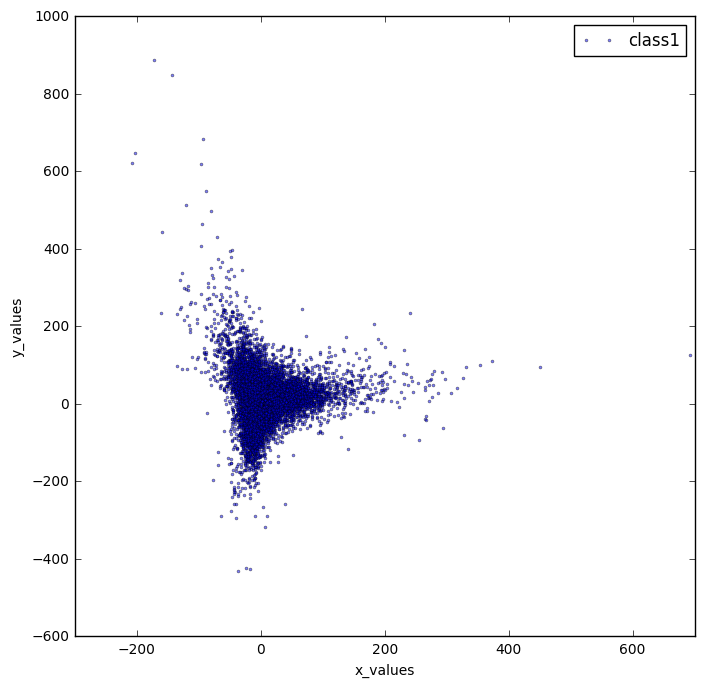

In [53]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11853746   0.09664564]
 [-11.27418382  65.25268536]
 [ -4.71391559 -40.63421033]
 [ 76.82337912  26.26358548]]


In [67]:
print (c_preds[0:100])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


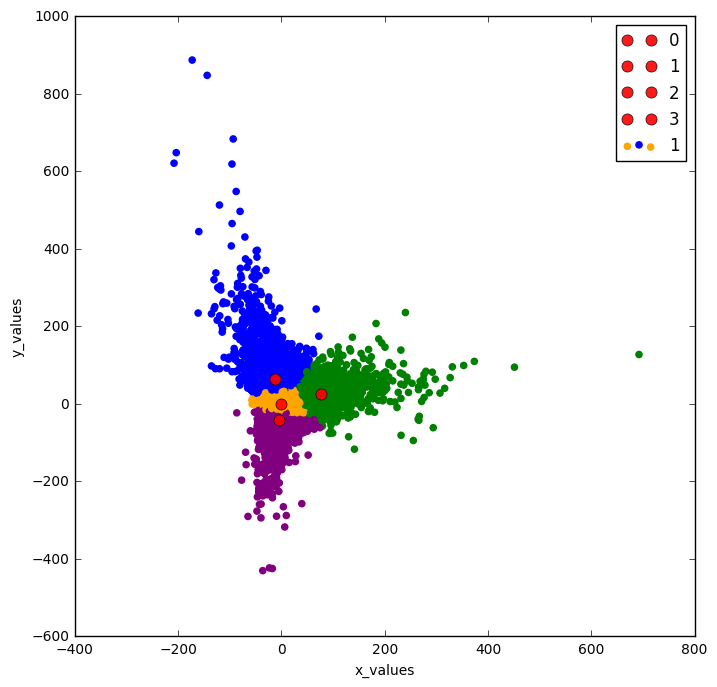

In [85]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

We have found a possible clustering for our customers. Let's check if we also manage to find some interesting pattern beneath it.

In [109]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,0


(206209, 135)


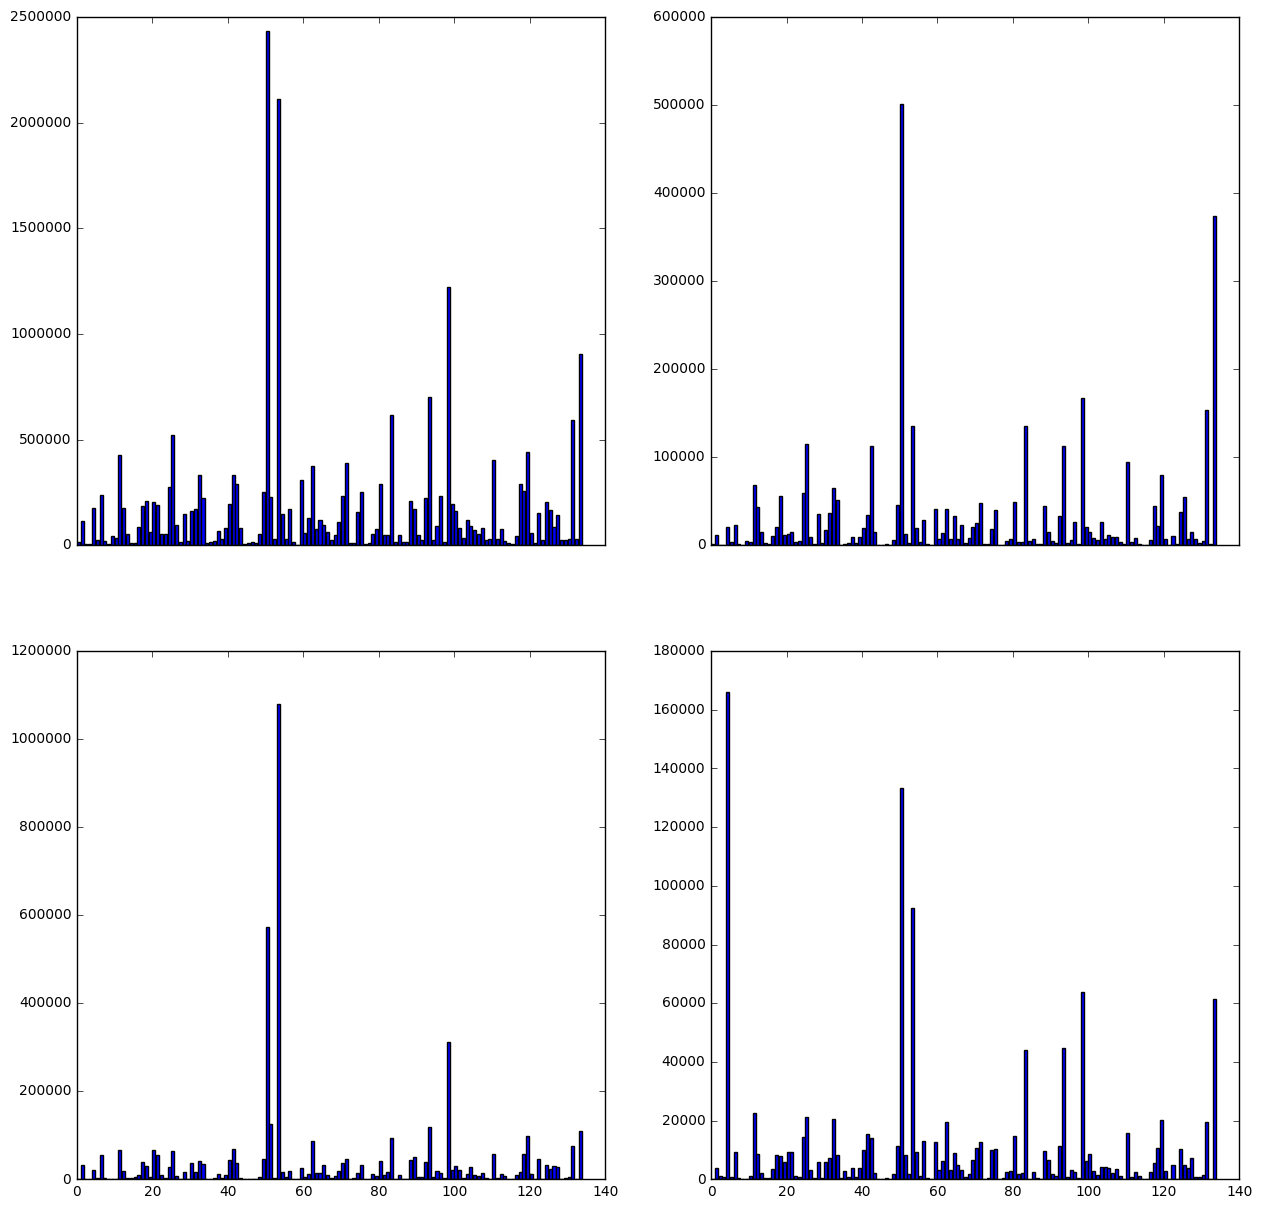

In [171]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))
c = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).sum()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c)
c = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).sum()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c)
c = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).sum()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c)
c = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).sum()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c)
plt.show()


## Training a Recurrent Neural Network

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Creating X and Y

In [76]:
val_data = mt[['user_id','order_id','product_id','add_to_cart_order','reordered']]
val_data= val_data.sort_values(by=['user_id','order_id','add_to_cart_order'])
val_data.head(10)

,user_id,order_id,product_id,add_to_cart_order,reordered
1221822,1,1187899,196,1,1
384828,1,1187899,25133,2,1
16024,1,1187899,38928,3,1
1008852,1,1187899,26405,4,1
1261776,1,1187899,39657,5,1
434610,1,1187899,10258,6,1
1157974,1,1187899,13032,7,1
1253908,1,1187899,26088,8,1
748460,1,1187899,27845,9,0
1239515,1,1187899,49235,10,1


In [78]:
input_data = order_prior[['user_id','order_id','product_id','add_to_cart_order','reordered']]
input_data= input_data.sort_values(by=['user_id','order_id','add_to_cart_order'])[0:500000]
input_data.head(10)

,user_id,order_id,product_id,add_to_cart_order,reordered
0,202279,2,33120,1,1
1,202279,2,28985,2,1
2,202279,2,9327,3,0
3,202279,2,45918,4,1
4,202279,2,30035,5,0
5,202279,2,17794,6,1
6,202279,2,40141,7,1
7,202279,2,1819,8,1
8,202279,2,43668,9,0
9,205970,3,33754,1,1


In [66]:
input_data.shape

(1000000, 4)

In [67]:
last_id = -1
max_order = 0
current_order = 0
for order in input_data.values:
    if order[0]!=last_id:
        if current_order > max_order:
            max_order = current_order
        current_order = 0
        last_id = order[0]
    else:
        current_order = current_order+1

print(max_order)

126


In [68]:
last_id = -1
max_order = 0
current_order = 0
for order in val_data.values:
    if order[0]!=last_id:
        if current_order > max_order:
            max_order = current_order
        current_order = 0
        last_id = order[0]
    else:
        current_order = current_order+1

print(max_order)

79


The longest sequence of orders consists of 79 single orders

In [69]:
last_id = -1
order_seq = []
reorder_seq = []
v_order_seq = []
v_reorder_seq = []
maxlen = 150
for order in input_data.values:
    if order[0]!=last_id:
        neworder = [0]*maxlen
        reorder  = [0]*maxlen
        neworder[0] = order[1]
        reorder[0]  = order[3]
        order_seq.append(neworder)
        reorder_seq.append(reorder)
        last_id = order[0]
        c=0
    else:
        c=c+1
        neworder[c]=order[1]
        reorder[c] = order[3]
        
for order in input_data.values:
    if order[0]!=last_id:
        neworder = [0]*maxlen
        reorder  = [0]*maxlen
        neworder[0] = order[1]
        reorder[0]  = order[3]
        v_order_seq.append(neworder)
        v_reorder_seq.append(reorder)
        last_id = order[0]
        c=0
    else:
        c=c+1
        neworder[c]=order[1]
        reorder[c] = order[3]

print(order_seq[0])
print(reorder_seq[0])
order_seq = np.asarray(order_seq)
print (len(order_seq))

[33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
99260


### Creating the Model

In [73]:
model = Sequential()
model.add(LSTM(100, input_shape=(maxlen,1)))
model.add(Dense(maxlen, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_3 (LSTM)                    (None, 100)           40800       lstm_input_3[0][0]               
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 150)           15150       lstm_3[0][0]                     
Total params: 55,950
Trainable params: 55,950
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [74]:
model.fit(np.asarray(order_seq).reshape(-1,maxlen,1),
          np.asarray(reorder_seq).reshape(-1,maxlen), 
          validation_data=(np.asarray(v_order_seq).reshape(-1,maxlen,1),
                           np.asarray(v_reorder_seq).reshape(-1,maxlen)),nb_epoch=1, 
          batch_size=128)

Train on 99260 samples, validate on 99260 samples
Epoch 1/1
99260/99260 [==============================] - 901s - loss: 0.0992 - acc: 0.9560 - val_loss: 0.0761 - val_acc: 0.9662


## Now try to predict

In [75]:
test = orders[orders['eval_set']=='test']

test= test.sort_values(by=['order_id','order_number'])
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0
584613,34,35220,test,20,3,11,8.0
3102779,137,187107,test,9,2,19,30.0
1929637,182,115892,test,28,0,11,8.0
590591,257,35581,test,9,6,23,5.0


In [ ]:
prior[prior['order_id']==17]

### Using PCA to Clusterize Customers

In [ ]:
dpts = pd.read_csv('../input/departments.csv')
dpts.head()

In [ ]:
import hypertools as hyp
tocluster = pd.DataFrame(ps[[0,1]][0:2000])
hyp.plot(tocluster,'o', n_clusters=10)

In [ ]:
cust_prod.shape

In [ ]:
np.correlate(ps[0],cust_prod[0])